<a href="https://colab.research.google.com/github/Gom30/Housing-Predictions-with-Linear-Regression/blob/main/Data_visualisation_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Load the dataset into a data frame using Python.

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
df2 = pd.read_csv("Africa_climate_change.csv")

In [8]:
df2.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [10]:
df2.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


Question 2: Clean the data as needed

In [11]:
#Check for missing values
df2.isnull(). sum()

,0
DATE,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


In [12]:
df2['PRCP'] = df2['PRCP'].fillna(0)

In [13]:
df2['TAVG'] = df2['TAVG'].fillna(df2['TAVG'].mean())

In [14]:
df2['TMAX'] = df2['TMAX'] .fillna(df2['TMAX'] .mean())

In [15]:
df2['TMIN'] = df2['TMIN'] .fillna(df2['TMIN'] .mean())

In [16]:
df2.isnull() .sum()

,0
DATE,0
PRCP,0
TAVG,0
TMAX,0
TMIN,0
COUNTRY,0


In [17]:
np.random.seed(42)

In [18]:
dates = pd.date_range(start='1980-01-01', end='2023-12-31', freq='ME')

In [19]:
countries = ['Egypt', 'Tunisia', 'Cameroon', 'Senegal', 'Angola']

In [20]:
data = []

In [21]:
for country in countries:
    for date in dates:
        tmin = np.random.uniform(10, 20)
        tmax = tmin + np.random.uniform(5, 15)
        tavg = (tmin + tmax) / 2
        data.append([date, country, round(tmin, 1), round(tmax, 1), round(tavg, 1)])

In [22]:
df2 = pd.DataFrame(data, columns=['DATE', 'COUNTRY', 'TMIN', 'TMAX', 'TAVG'])

In [23]:
df2['year'] = df2['DATE'].dt.year

Question 3: Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

In [24]:
# Line chart for Tunisia and Cameroon
df2_line = df2[df2['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

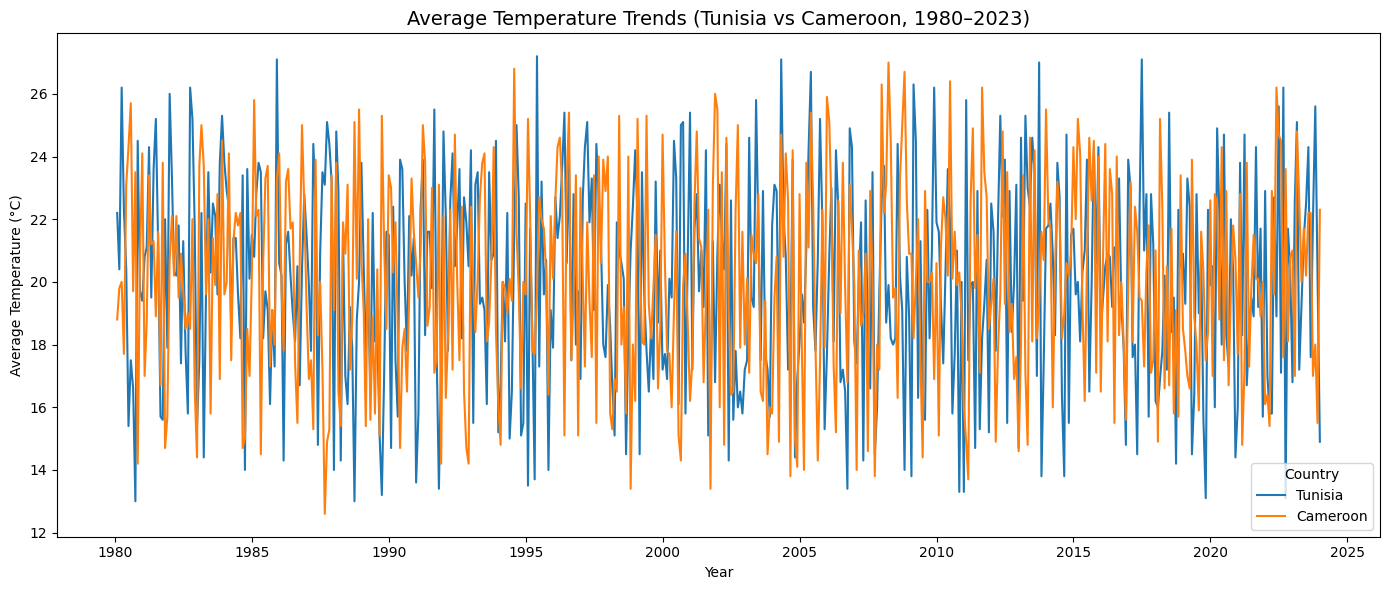

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df2_line, x='DATE', y='TAVG', hue='COUNTRY')
plt.title('Average Temperature Trends (Tunisia vs Cameroon, 1980–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Country')
plt.tight_layout()
plt.savefig("tunisia_cameroon_avg_temp_trends.png")
plt.show()

**Result interpretation**: From the line chart above, The chart shows that Tunisia (blue line) generally experiences higher and more variable average temperatures than Cameroon (orange line) from 1980 to 2023. Both countries display strong seasonal fluctuations, but no clear long-term warming or cooling trend is evident over the period.

**Question 4**: Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

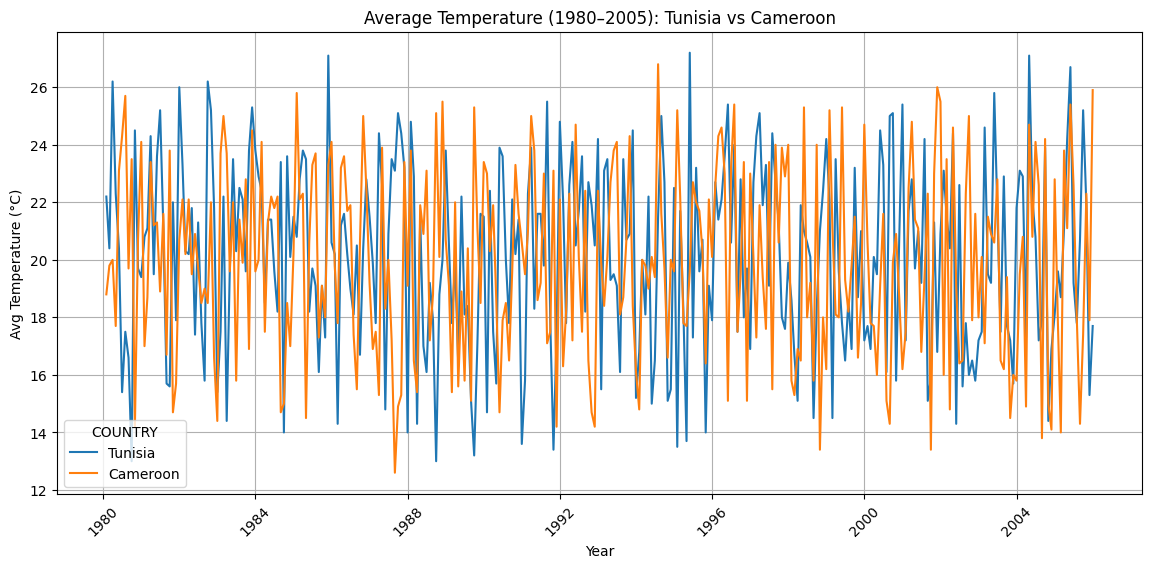

In [26]:
# Zoom in (1980–2005)
#Filter data for Tunisia and Cameroon again
df2_zoom = df2_line[(df2_line['year'] >= 1980) & (df2_line['year'] <= 2005)]
plt.figure(figsize=(14, 6))
sns.lineplot(data=df2_zoom, x='DATE', y='TAVG', hue='COUNTRY')
plt.title('Average Temperature (1980–2005): Tunisia vs Cameroon')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("tunisia_cameroon_avg_temp_1980_2005.png")
plt.show()

**Question 5**: Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

<ipython-input-27-9b186996d827>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


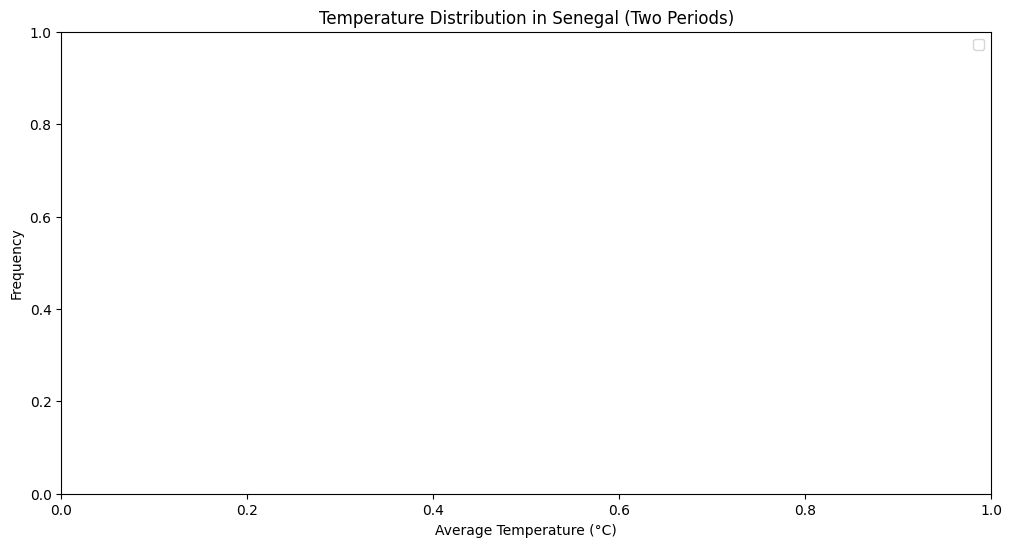

In [27]:
# Histograms for Senegal
df2_senegal = df2_zoom[df2_zoom['COUNTRY'] == 'Senegal']  #Filter Senegal data
#define time periods
df2_80_00 = df2_senegal[(df2_senegal['year'] >= 1980) & (df2_senegal['year'] < 2000)]
df2_00_23 = df2_senegal[(df2_senegal['year'] >= 2000) & (df2_senegal['year'] <= 2023)]
#plot histogram for average temperature
plt.figure(figsize=(12, 6))
sns.histplot(df2_80_00['TAVG'], kde=True, bins=20, label='1980–2000', color='skyblue', element="step", stat="density")
sns.histplot(df2_00_23['TAVG'], kde=True, bins=20, label='2000–2023', color='orange', alpha=0.6, element="step", stat="density")
#sns.histplot(df2_80_00['TAVG'], kde=True, bins=20, label='1980–2000', color='skyblue')
#sns.histplot(df2_00_23['TAVG'],kde=True, bins=20, alpha=0.6, label='2000–2023', color='orange')
plt.title('Temperature Distribution in Senegal (Two Periods)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("senegal_temp_distribution.png")
plt.show()

**Question 6**:Select the best chart to show the Average temperature per country.


*  Bar chart is ideal here because it allows easy comparison of values across categories(countries).




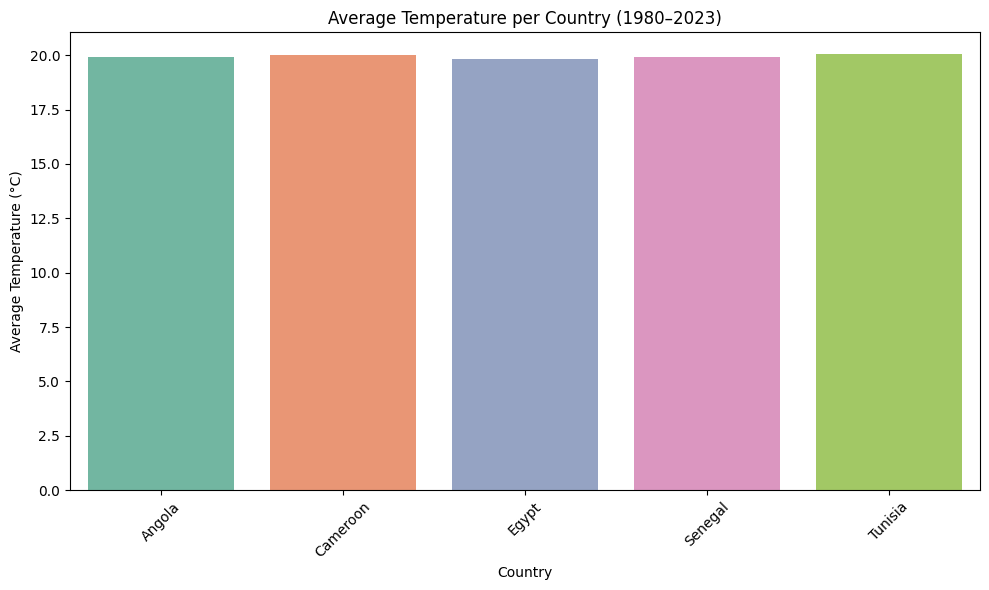

In [32]:
# Bar chart for average temperature per country
# Calculate average temperature per country
avg_temp_by_country = df2.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_temp_by_country,
    x='COUNTRY',
    y='TAVG',
    hue='COUNTRY',         # assign x to hue to use palette
    palette='Set2',
    legend=False           # suppress redundant legend
)
plt.title('Average Temperature per Country (1980–2023)')
plt.ylabel('Average Temperature (°C)')
plt.xlabel('Country')
plt.xticks(rotation=45)  # Rotate labels if many countries
# plt.savefig("avg_temp_per_country.png")
plt.tight_layout()
plt.show()


**Question 7:** Make your own questions about the dataset and try to answer them using the appropriate visuals.

**Asked question**: Which countries experience the most variability in average temperature over the recorded period?"

**Aim**: This question aims to explore how much average temperature fluctuates within each country — useful for understanding climate stability or extremes.

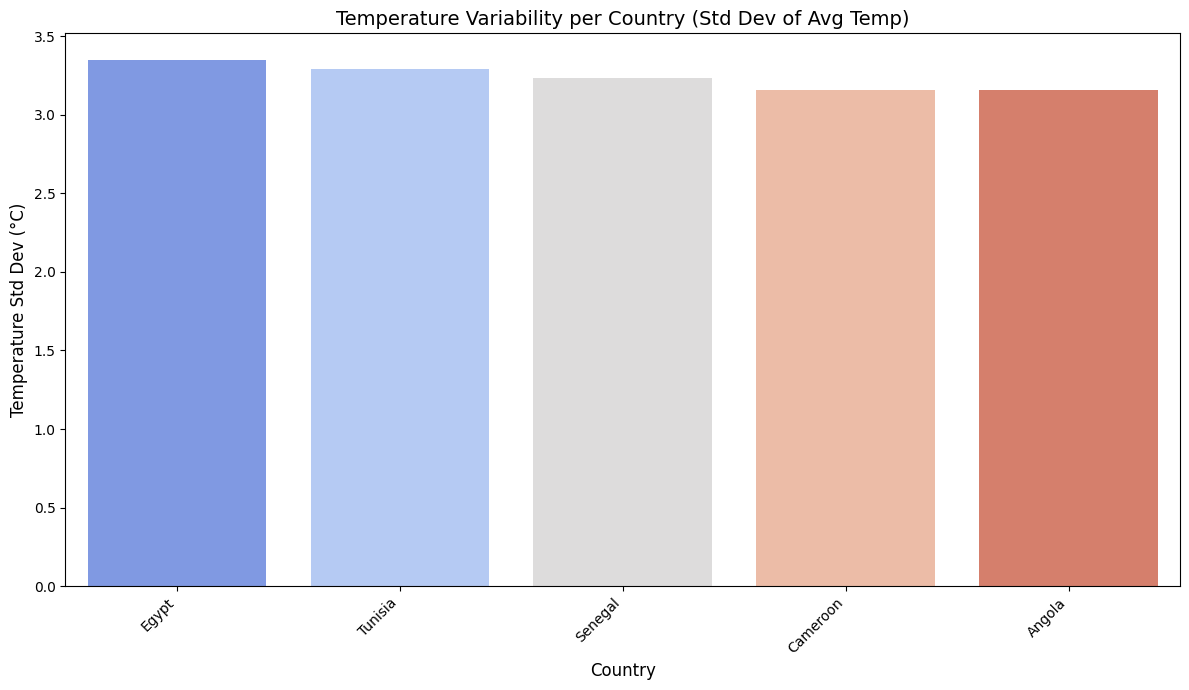

In [36]:
# Calculate standard deviation of average temperature per country
temp_std = df2.groupby('COUNTRY')['TAVG'].std().reset_index()

# Sort by highest variability for clearer visualization
temp_std = temp_std.sort_values(by='TAVG', ascending=False)

# Plot with updated hue usage
plt.figure(figsize=(12, 7))
sns.barplot(data=temp_std, x='COUNTRY', y='TAVG', hue='COUNTRY', palette='coolwarm', legend=False)
plt.title('Temperature Variability per Country (Std Dev of Avg Temp)', fontsize=14)
plt.ylabel('Temperature Std Dev (°C)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("temp_variability_per_country.png")
plt.show()

